In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from EdgeDecay import EdgeDecay
import matplotlib as mpl



In [2]:
# instantiate your decay model
decay_days = 90
decay = EdgeDecay(decay_days=decay_days, final_weight=0.02)
n_days = int(decay_days*1.1)

# create linspace of days
days = np.linspace(0, n_days, n_days+1)  # 0 to 120 days (inclusive)

# build DataFrame
df = pd.DataFrame({
    "days": days,
    "linear": [decay.linear(d) for d in days],
    "exponential": [decay.exponential(d) for d in days],
    "logarithmic": [decay.logarithmic(d) for d in days],
    "sigmoid": [decay.sigmoid(d) for d in days],
    "quadratic": [decay.quadratic(d) for d in days]

})

df.head()

,days,linear,exponential,logarithmic,sigmoid,quadratic
0,0.0,1.000000,1.000000,1.000000,0.993441,1.000000
1,1.0,0.989111,0.957464,0.849411,0.992676,0.999879
2,2.0,0.978222,0.916738,0.761323,0.991822,0.999516
3,3.0,0.967333,0.877744,0.698823,0.990870,0.998911
4,4.0,0.956444,0.840408,0.650344,0.989809,0.998064


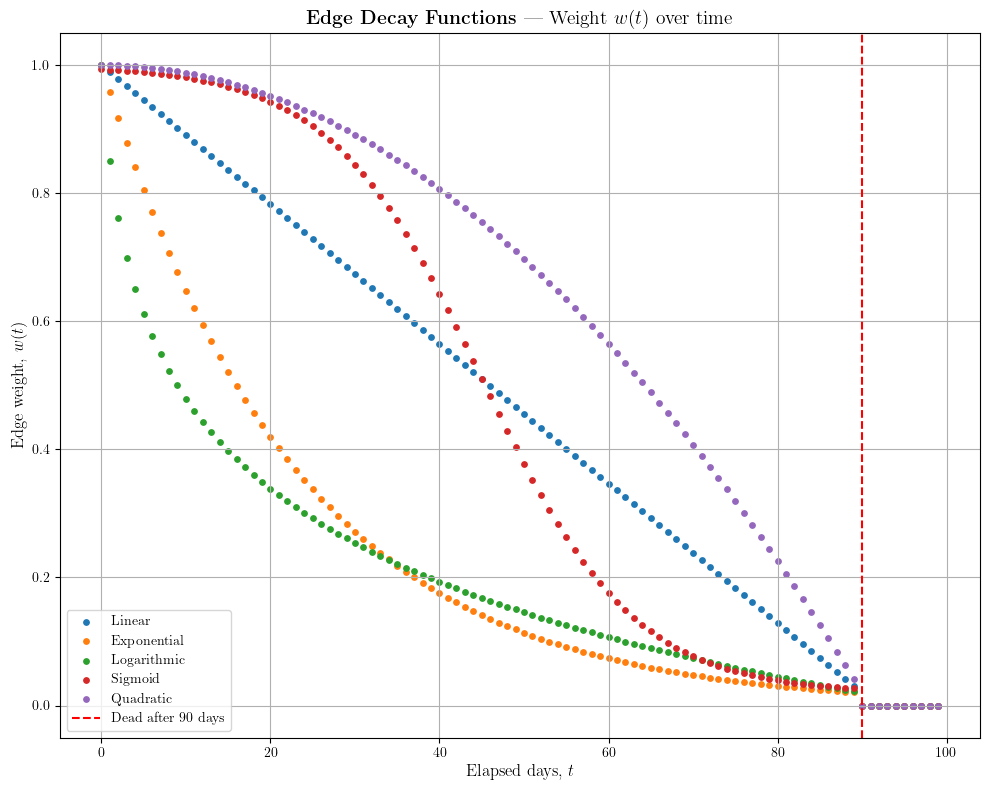

In [3]:
# LaTeX-like formatting
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

plt.figure(figsize=(10, 8))

# scatter plots for each decay type
plt.scatter(df["days"], df["linear"], label=r"Linear", s=15)
plt.scatter(df["days"], df["exponential"], label=r"Exponential", s=15)
plt.scatter(df["days"], df["logarithmic"], label=r"Logarithmic", s=15)
plt.scatter(df["days"], df["sigmoid"], label=r"Sigmoid", s=15)
plt.scatter(df["days"], df["quadratic"], label=r"Quadratic", s=15)

# vertical dashed line at decay_days
plt.axvline(x=decay.decay_days, color='red', linestyle='--',
            label=fr"Dead after {decay.decay_days} days")

# titles & labels with LaTeX formatting
plt.title(r"\textbf{Edge Decay Functions} --- Weight $w(t)$ over time", fontsize=14)
plt.xlabel(r"Elapsed days, $t$", fontsize=12)
plt.ylabel(r"Edge weight, $w(t)$", fontsize=12)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()